In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import numpy as np


In [22]:
#Import CSV and Create Ticker List
SP500 = pd.read_csv('Resources/companylistsp500.csv')
#nasdaq = pd.read_csv('Resources/NASDAQ.txt')
tickers = list(SP500['Symbol'])
len(tickers)


505

In [23]:
#Set Seed
rd.seed(1930)

#Choose Random Stocks
stocks = []
for stock in range(10):
    randomS = rd.sample(tickers, 30)
    stocks.append(randomS)



In [48]:
#Generate random weights
#Set Seed
rd.seed(1930)
#Generate list of lists of random numbers
weights = []
for i in range(10):
    randomlist = rd.sample(range(1, 99), 30)
    dby = sum(randomlist)
    rws = []
    for x in randomlist:
        rw = x/dby
        rws.append(rw)
    weights.append(rws)
pd.Series(weights[1]).sum() 

1.0

In [25]:
#Create Portfolios
out = []
for i in range (2):
    d = dict(zip(stocks[i],weights[i]))
    out.append(d)
out

[{'CBOE': 0.015261044176706828,
  'JBHT': 0.005622489959839358,
  'ADM': 0.03453815261044177,
  'NWS': 0.007228915662650603,
  'WYNN': 0.02650602409638554,
  'VMC': 0.016867469879518072,
  'TT': 0.02891566265060241,
  'EIX': 0.012048192771084338,
  'ADSK': 0.07791164658634538,
  'ZBRA': 0.06746987951807229,
  'SWKS': 0.027309236947791166,
  'ANSS': 0.008835341365461847,
  'ROL': 0.020080321285140562,
  'DISCA': 0.05220883534136546,
  'HPE': 0.058634538152610445,
  'MET': 0.06104417670682731,
  'GPS': 0.05060240963855422,
  'WM': 0.024899598393574297,
  'MCHP': 0.014457831325301205,
  'TRV': 0.004016064257028112,
  'HSY': 0.0321285140562249,
  'NVR': 0.0024096385542168677,
  'IR': 0.06345381526104418,
  'CBRE': 0.008032128514056224,
  'EXR': 0.036947791164658635,
  'MSFT': 0.03293172690763052,
  'WLTW': 0.04176706827309237,
  'PCAR': 0.0714859437751004,
  'GOOGL': 0.06827309236947791,
  'ICE': 0.028112449799196786},
 {'FITB': 0.0111731843575419,
  'TTWO': 0.015363128491620111,
  'DAL': 

In [26]:
fprofit = []
NA = []
for x in out:
    tickers = list(x.keys())
    tw = list(x.values())
    for y in range(len(tickers)):
        try:
            ticker = yf.Ticker(tickers[y])
            hist = ticker.history(period="5y")
            profit = 1-(hist.loc[hist.index[y], 'Close']/hist.loc[hist.index[len(hist)-1], 'Close'])
            pw = profit*tw[y]
            fprofit.append(pw)
        except:
            NA.append(tickers[y])


In [46]:
tw = list(tp.values())


NameError: name 'tp' is not defined

In [28]:
serie = pd.Series(fprofit)
serie.mean()

TypeError: cannot convert the series to <class 'float'>

In [18]:
NA

['DMS.WS', 'OAC.U', 'NTEST.A', 'SHLL.WS', 'SCA']

In [60]:


final = pd.DataFrame(fprofit)
final.drop(index = 15, axis = 0, inplace = True)



{'whiskers': [<matplotlib.lines.Line2D at 0x7fe574c1cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe574822b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe574ce5cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe574c1c750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe574849cd0>],
 'means': []}

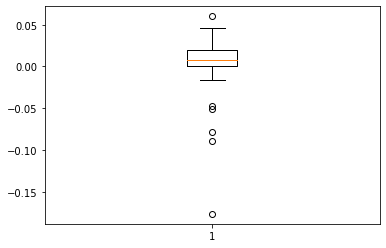

In [61]:
plt.boxplot(final.iloc[:,0].astype('float'))